# Our first machine learning model

> "All models are wrong, but some are useful." 
>
> - George Box (British Statistician)

In the last lesson, we saw how to load and plot our data using the plotly.  We applied this to plotting the monthly revenue from Max's Wine Bar in Dallas.  In this lesson, we'll begin to make predictions for future data sets.

### Reviewing our Graph

Let's start by reviewing our graph of monthly revenue from Max's diner.

import plotly.plotly as py


scatter = {'x': months, 'y': revenues, 'mode': 'markers'}
py.plot([scatter])

Now it's generally easier to work with numbers instead of dates.  So let's change our months into "Months since September 2015".  So our first month would be month zero, and our second month October 2015 would be month 1, and so on.

This is easy enough to do.  Because our dates are in order, and don't skip any values.  Instead of our current list of months for September 2015 through October 2017, we can just use the numbers 0 through 23.

In [1]:
months_since_september = list(range(0, 24))

In [2]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
scatter = {'x': months_since_september, 'y': revenues, 'mode': 'markers'}
iplot([scatter])

NameError: name 'revenues' is not defined

### Making our estimate

Now the plot above shows a downward trend in the data.  And if we were to ask you what the revenue might look like in October 2017, you would probably think that we would continue the downward trend from before.  

In machine learning, we do the same thing.  All we do is draw a line through our data.

In [ ]:
line = {'x': [months_since_september[0], months_since_september[-1]], 'y': [revenues[0], revenues[-1]]}

scatter = {'x': months_since_september, 'y': revenues, 'mode': 'markers'}
iplot([scatter, line])

To draw this line above, we started with the second point, and ended through the second to last point.  We excluded the first and last points because they really don't fit the rest fo the data.  

```python
line = {'x': [sorted_dates[1], sorted_dates[-2]], 'y': [sorted_revenues[1], sorted_revenues[-2]]}
```

But don't worry too much about our formula for drawing a line.  We'll improve upon it later.

The important thing, is that everything along this line is a prediction.  So the line's prediction for revenue in the month of May 31 is a little above 40k while the we can see that the actual value was 34.9 thousand.  

### Improving our line

Now after drawing our initial line, the next step is to draw a better line.  For example, maybe we should tilt our line down more, or shift the whole line up or down.

If we just had a metric to determine what makes a line "better".  The way that we'll evaluate our line is to see the difference between what the line *predicted* for a data point, and the *actual* value.

In [98]:
from error import error_line_trace
from linear_equations import build_regression_line
from graph import m_b_trace, plot, m_b_data, trace_values

In [97]:
y_values = m_b_data(-2487.34, 66609, list(range(0, 24)))['y']

In [107]:
list(range(0, 24))[-1]

23

In [105]:
model = build_regression_line(list(range(0, 24)), revenues)

In [119]:
error = error_line_trace(list(range(0, 24)), revenues, model['m'], model['b'], 23)
error['mode'] = 'lines'
error['textposition'] = 'top right'

In [122]:
error['x'] = [months[-2], months[-2]]

In [125]:
error['y'][0] = 39627

In [128]:
error['y'][1] = 11887

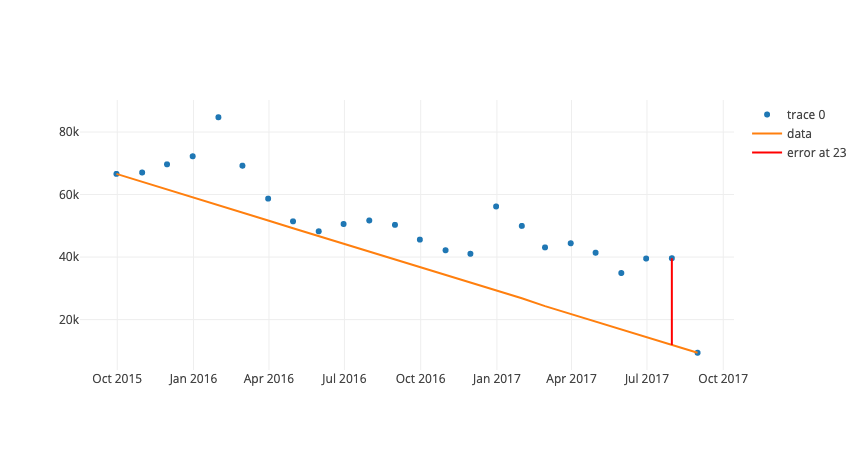

In [129]:
line = trace_values(months, y_values, mode = 'lines')
plot([scatter, line, error])

In [84]:
x_values = list(range(0, 24))

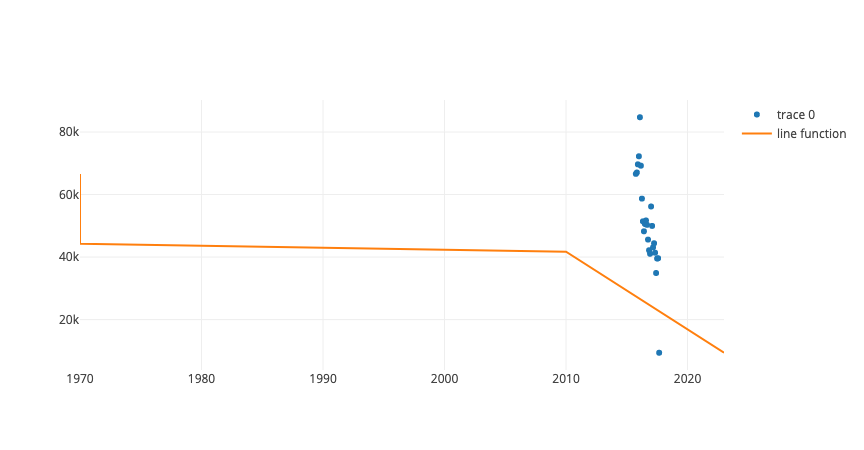

In [82]:
iplot([scatter, model])

22

In [ ]:
error_line_trace(sorted_dates, sorted_revenues, )